In [46]:
# import necesary libraries

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split

In [47]:
# load the dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [48]:
# find the correlation of each dimesnion with the target variable to reduce the dimension by selecting ones with high correlation

#combine the data and target value to one dataset so that we can correlate 
comb_data = []
for details, targs in zip(iris.data, iris.target):
    comb_details = np.append(details, int(targs))
    comb_data.append(comb_details)


# find the correlation matrix
corr_matrix = np.corrcoef(np.array(comb_data), rowvar=False)

In [49]:
# print out correlation matrix
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113,  0.78256123],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593, -0.42665756],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543,  0.9490347 ],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ,  0.95654733],
       [ 0.78256123, -0.42665756,  0.9490347 ,  0.95654733,  1.        ]])

<Axes: >

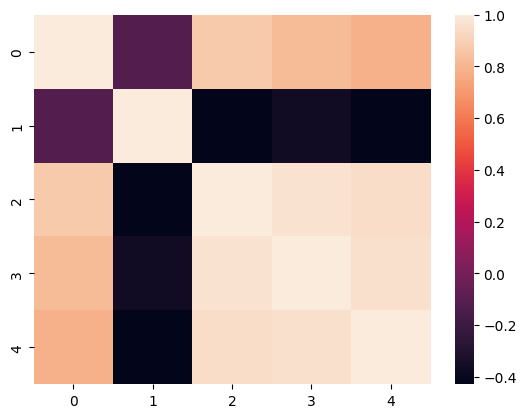

In [50]:
# visualise the matrix (0,1,2,3 are the dimensions and 4 is the target variable)
sns.heatmap(corr_matrix)

In [51]:
# extract the useful dimensions
X = iris.data[:, 2:4]

# save the target variable to y.
y = iris.target

In [52]:
# split the datasets to train and test sets in random
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40, shuffle = True)

In [53]:
# design knn algorithm

class KNN:
    def __init__(self, k, dataset, targets):
        self.k = k
        self.dataset = dataset
        self.targets = targets
    
    def predict(self, new_point):
        distances = []
        for target, data in zip(self.targets, self.dataset):
            distance = np.sqrt(np.sum((np.array(data) - np.array(new_point))**2)) # euclidian distance
            distances.append([distance, target])
        
        filtered_targets = [each[1] for each in sorted(distances)[:self.k]] # filtering out the first k distances
        common_target = Counter(filtered_targets).most_common(1)[0][0] # finding the most occured target value in the filtered values.

        # assigning actual flower names
        if common_target == 0:
            flower_type = "Setosa"
        elif common_target == 1:
            flower_type = "Versicolor"
        else:
            flower_type = "Virginica"

        return common_target, flower_type


In [57]:
# construct the model. provide k value, dataset and target values to train
model = KNN(k = 5, dataset = X_train, targets = y_train)

# provide new data points to make a prediction and extract the predicted target and flower type.
common_target, flower_type = model.predict([4., 1.])
print(f"The predicted Class is: {common_target}, and the flower type is {flower_type}.")

The predicted Class is: 1, and the flower type is Versicolor.


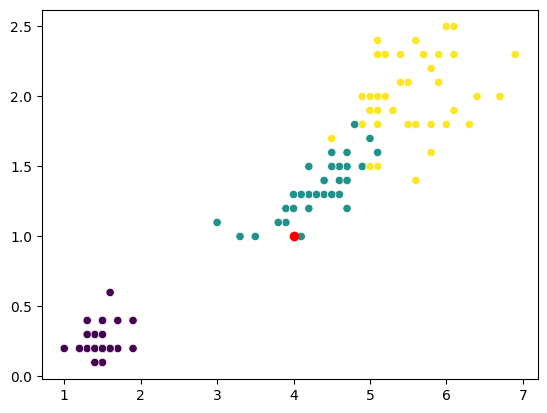

In [55]:
#plot the predicted point to see where it falls in the clusters and whether its true or not.
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], c = y_train)
plt.scatter(x = 4.0, y = 1.0, c = 'red')